In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Define Gaussian Sampling Distributions
1. Mean of Gaussians (mu)
2. Variance of Gaussians (var)
3. Degrees of Freedom (df) - Only for T-distribution Sampling
4. Number of Bootstrapped Samples (n)

In [125]:
mu = [1,2,4]
sd = [0.1,2,3]
df = [10,5,17]
n = 10000

#### Define Bootstrapped Parameter

In [111]:
def func(x):
    return np.sum(x)

#### Bootstrap Sampling Functions

In [112]:
def bootnorm(mu,S,samples):
    return np.random.normal(loc=mu, scale = S, size=samples)

def bootstudent(mu,S,df,samples):
    out=np.standard_t(df=df,size=samples)*S+mu
    return out    

#### Create Bootstrapped Samples

In [126]:
dist_names=[]
for i in np.arange(0,len(mu),1):
    dist_names.append("dist"+str(i))

np.random.seed(seed=1234)

samples = pd.DataFrame(bootnorm(mu[0],sd[0],n))
for i in np.arange(1,len(mu),1):
    samples[i] = pd.Series(bootnorm(mu[i],sd[i],n))
    
samples.columns = dist_names

#### Create Bootstrap Estimates of Parameter

In [127]:
samples['par']=samples.apply(func,axis=1) 

#### Plot All Bootstrapped Distributions

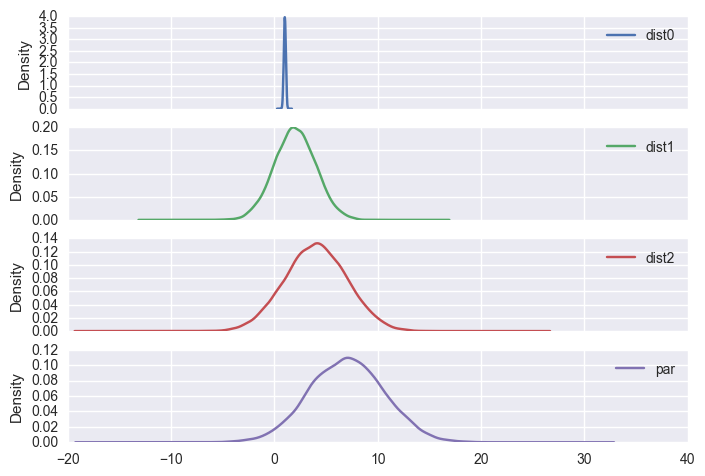

In [129]:
samples.plot(kind='kde',subplots=True)
plt.show()

In [130]:
samples.describe()

,dist0,dist1,dist2,par
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.001613,1.995675,4.011280,7.008568
std,0.099523,1.988290,2.992975,3.594439
min,0.611910,-5.635712,-7.835137,-6.234724
25%,0.935300,0.647550,1.992690,4.508290
50%,1.001809,1.979236,4.011103,7.007819
75%,1.068366,3.338231,6.055203,9.445296
max,1.328779,9.403258,15.168655,19.828798
